<a href="https://colab.research.google.com/github/vaishnavi17398/FeynnLabsInternship/blob/main/MCDonals_Segmentation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving mcdonalds.csv to mcdonalds.csv


In [ ]:
import pandas as pd
import io
 # Create DataFrame
df = pd.read_csv(io.BytesIO(uploaded['mcdonalds.csv']))
print(df)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
0         No         No   

In [ ]:

df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
print(df.isnull().sum())


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [ ]:
print(df.describe())

               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


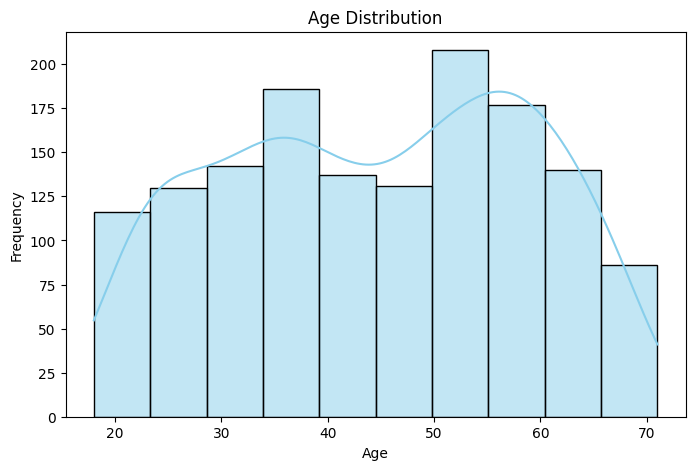

In [ ]:
# Age Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-8-f237dd16c9af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VisitFrequency', palette='pastel')


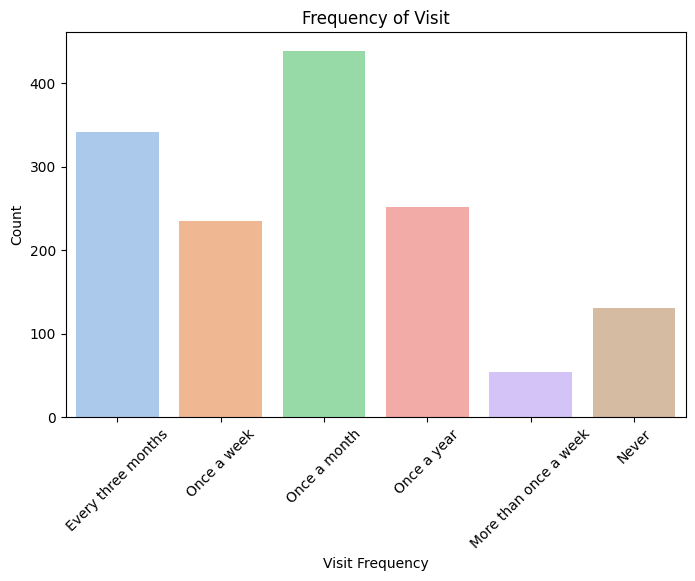

In [ ]:
# Frequency of Visit
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='VisitFrequency', palette='pastel')
plt.title('Frequency of Visit')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-aaca1436f6a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


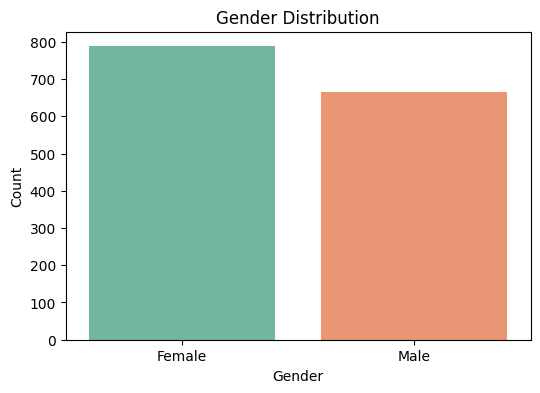

In [ ]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Correlation Analysis
numeric_columns = ['Like', 'Age']
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


In [ ]:
# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_df = df.copy()
for col in categorical_columns:
    encoded_df[col] = encoder.fit_transform(df[col])

In [ ]:
# Calculate correlation matrix
correlation_matrix = encoded_df[numeric_columns + categorical_columns].corr()

<ipython-input-12-b4cd6e5c0cd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = encoded_df[numeric_columns + categorical_columns].corr()


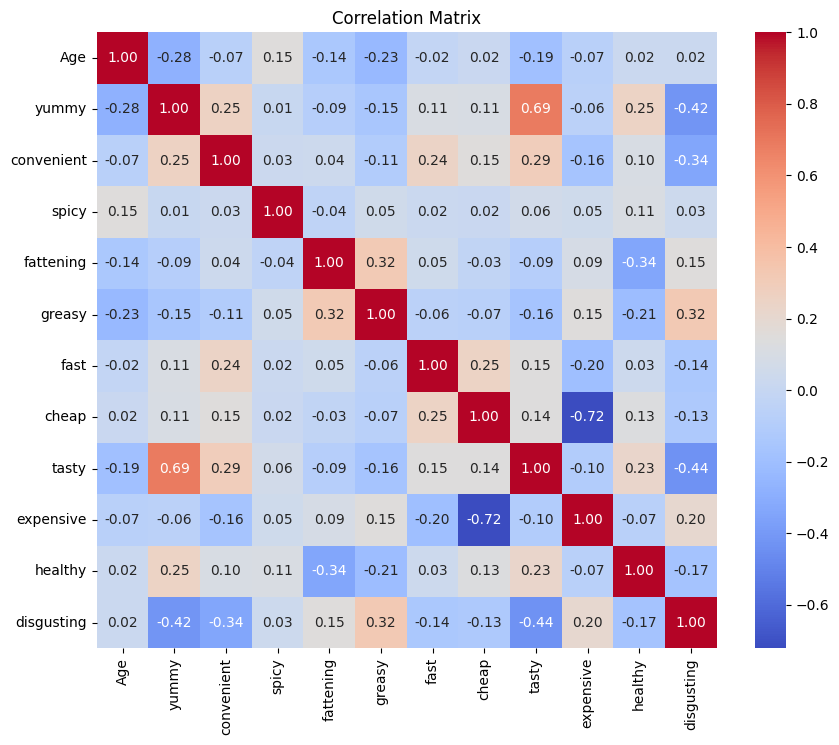

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Convert 'VisitFrequency' to numerical format
visit_frequency_map = {'Every three months': 3, 'Once a week': 7, 'Once a month': 1}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_frequency_map)


In [ ]:
# Encode 'Gender' column
gender_map = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_map)

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,3.0,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,3.0,1
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,3.0,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,7.0,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,1.0,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convert string columns to numeric
numeric_columns = ['Like', 'Age', 'VisitFrequency', 'Gender']
df[numeric_columns] = df[numeric_columns].astype(float)


ValueError: could not convert string to float: 'I love it!+5'

In [22]:
# Clean the 'Like' column
import re

df['Like'] = df['Like'].apply(lambda x: re.search(r'[-+]?\d+', x).group(0)).astype(int)


In [23]:
# Convert string columns to numeric
numeric_columns = ['Age', 'VisitFrequency', 'Gender']
df[numeric_columns] = df[numeric_columns].astype(float)


In [24]:
# Selecting relevant columns for PCA
pca_columns = ['Like', 'Age', 'VisitFrequency', 'Gender']



In [25]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[pca_columns])

In [26]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [27]:
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

<ipython-input-27-e305e80c8695>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [28]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [30]:
# Check for NaNs in the standardized data
import numpy as np

print(np.isnan(scaled_data).sum())

437


In [31]:
# Drop rows with NaN values
cleaned_df = df.dropna()

# Standardize the cleaned data
scaled_data = scaler.fit_transform(cleaned_df[pca_columns])

In [32]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

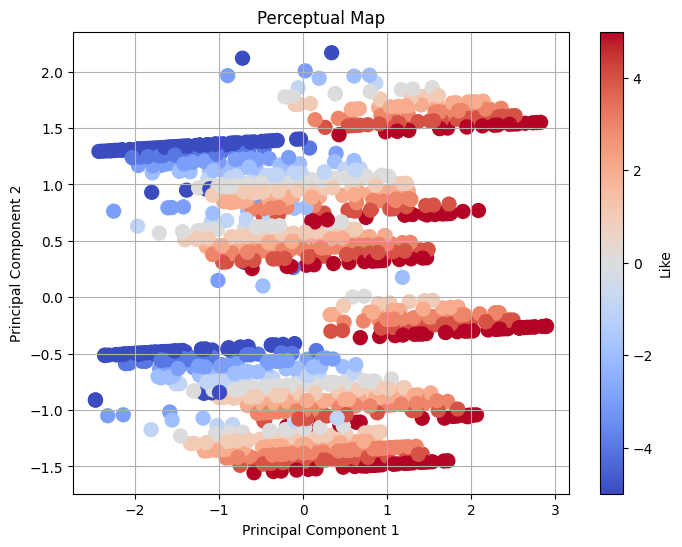

In [33]:
# Create a perceptual map
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cleaned_df['Like'], cmap='coolwarm', s=100)
plt.title('Perceptual Map')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Like')
plt.grid(True)
plt.show()

In [34]:
# Print explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.32469857 0.25554095]


In [35]:
# Print components' loadings
print("\nPrincipal Components Loadings:")
print(pca.components_)


Principal Components Loadings:
[[ 0.65965084 -0.65572894  0.36566475  0.03419955]
 [-0.19748828 -0.03010829  0.38648444 -0.90040083]]


In [ ]:
#extract segments using K-means clustering

In [36]:
from sklearn.cluster import KMeans

In [37]:
# Select relevant features for clustering
features_for_clustering = ['Like', 'Age', 'VisitFrequency', 'Gender']

In [38]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features_for_clustering])

In [39]:
# Choose the number of clusters (segments)
num_clusters = 3

In [40]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
# Analyze the segments
segment_means = df.groupby('Segment')[features_for_clustering].mean()
print("Segment Means:")
print(segment_means)


Segment Means:
             Like        Age  VisitFrequency    Gender
Segment                                               
0        2.978723  38.753191        7.000000  0.502128
1        0.177007  45.479927        2.284377  0.000000
2        0.495522  45.941791        2.314670  1.000000


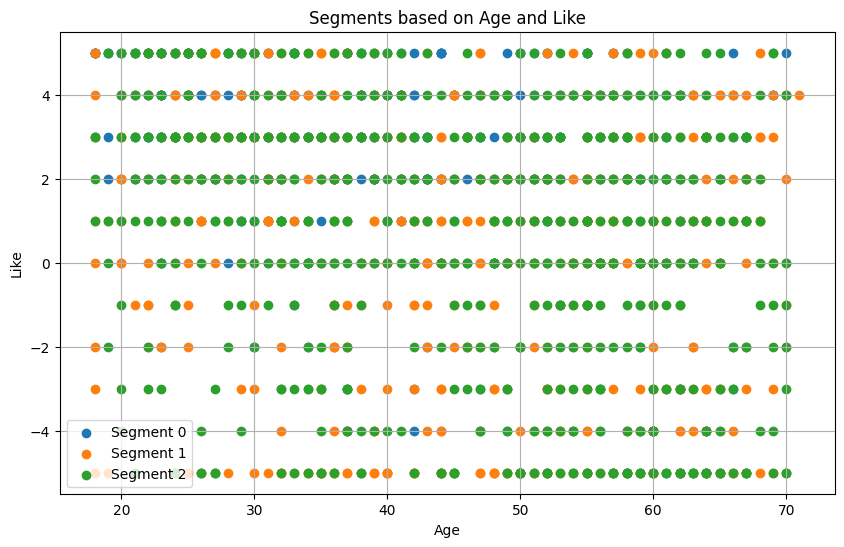

In [42]:
# Visualize the segments
plt.figure(figsize=(10, 6))
for segment in range(num_clusters):
    plt.scatter(df[df['Segment'] == segment]['Age'], df[df['Segment'] == segment]['Like'], label=f'Segment {segment}')
plt.title('Segments based on Age and Like')
plt.xlabel('Age')
plt.ylabel('Like')
plt.legend()
plt.grid(True)
plt.show()

Here's a brief interpretation based on the provided segment means:

Segment 0: This segment has a relatively high 'Like' score (mean around 3), indicating that people in this segment tend to have a positive perception of the product/service. They are younger on average (mean age around 38.75) compared to the other segments. They also have a high visit frequency (mean around 7), suggesting that they are frequent visitors. The gender distribution in this segment is relatively balanced (mean gender value around 0.5), indicating a mix of both genders.

Segment 1: This segment has a very low 'Like' score (mean around 0.18), indicating that people in this segment have a negative perception of the product/service. They are older on average (mean age around 45.48) compared to Segment 0 and Segment 2. The visit frequency in this segment is relatively low (mean around 2.28), suggesting that they visit less frequently. The gender value in this segment is 0, indicating that it may represent a specific gender group (e.g., only males or only females).

Segment 2: This segment has a slightly higher 'Like' score (mean around 0.50) compared to Segment 1 but still relatively low. The age distribution in this segment is similar to Segment 1, with an average age of around 45.94. The visit frequency is also similar to Segment 1, with a mean around 2.31. The gender distribution in this segment is homogeneous, with a mean gender value of 1, indicating that it may represent the other gender group (e.g., if Segment 1 represents males, Segment 2 represents females).

In [ ]:
#To extract segments using a mixture of distributions, we can use a Gaussian Mixture Model (GMM)

In [43]:
from sklearn.mixture import GaussianMixture

In [44]:
# Choose the number of segments (components in the mixture)
num_components = 3

In [45]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_components, random_state=42)
df['Segment_GMM'] = gmm.fit_predict(scaled_data)


In [46]:
# Analyze the segments
segment_means_gmm = df.groupby('Segment_GMM')[features_for_clustering].mean()
print("Segment Means (GMM):")
print(segment_means_gmm)

Segment Means (GMM):
                 Like        Age  VisitFrequency    Gender
Segment_GMM                                               
0            0.177007  45.479927        2.284377  0.000000
1            0.495522  45.941791        2.314670  1.000000
2            2.978723  38.753191        7.000000  0.502128


Here's a brief interpretation based on the provided segment means:

Segment_GMM 0: This segment has a very low 'Like' score (mean around 0.18), indicating that people in this segment have a negative perception of the product/service. They are older on average (mean age around 45.48) compared to other segments. The visit frequency in this segment is relatively low (mean around 2.28), suggesting that they visit less frequently. The gender value in this segment is 0, indicating that it may represent a specific gender group (e.g., only males).

Segment_GMM 1: This segment has a slightly higher 'Like' score (mean around 0.50) compared to Segment_GMM 0 but still relatively low. The age distribution in this segment is similar to Segment_GMM 0, with an average age of around 45.94. The visit frequency is also similar to Segment_GMM 0, with a mean around 2.31. The gender distribution in this segment is homogeneous, with a mean gender value of 1, indicating that it may represent the other gender group (e.g., if Segment_GMM 0 represents males, Segment_GMM 1 represents females).

Segment_GMM 2: This segment has a relatively high 'Like' score (mean around 2.98), indicating that people in this segment tend to have a positive perception of the product/service. They are younger on average (mean age around 38.75) compared to the other segments. They also have a high visit frequency (mean around 7), suggesting that they are frequent visitors. The gender distribution in this segment is relatively balanced (mean gender value around 0.50), indicating a mix of both genders.

In [ ]:
#Extracting segments using mixtures of regression models involves fitting separate regression models to different segments of the data, where each segment represents a subset of the data with similar characteristics

In [47]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression


In [48]:
# Choose the number of segments (components in the mixture)
num_segments = 3

In [49]:
# Fit Gaussian Mixture Model to segment the data
gmm = GaussianMixture(n_components=num_segments, random_state=42)
df['Segment'] = gmm.fit_predict(scaled_data)

In [50]:
# Prepare for regression
features_for_regression = ['Age', 'VisitFrequency', 'Gender']  # Features used in regression
target_variable = 'Like'  # Target variable to predict

In [51]:
# Fit separate regression models for each segment
regression_models = []
for segment in range(num_segments):
    segment_data = df[df['Segment'] == segment]
    X_segment = segment_data[features_for_regression]
    y_segment = segment_data[target_variable]
    regression_model = LinearRegression()
    regression_model.fit(X_segment, y_segment)
    regression_models.append(regression_model)

In [52]:
# Predict using the fitted models
new_data = pd.DataFrame({'Age': [40], 'VisitFrequency': [5], 'Gender': [1]})  # Example new data
predictions = []
for model in regression_models:
    prediction = model.predict(new_data)
    predictions.append(prediction)

In [53]:
print("Predictions for each segment:", predictions)


Predictions for each segment: [array([-3.54016]), array([-2.91210219]), array([3.28487132])]


The result shows the predicted 'Like' scores for each segment based on the provided example new data point:

For Segment 0: Predicted 'Like' score is approximately -3.54.
For Segment 1: Predicted 'Like' score is approximately -2.91.
For Segment 2: Predicted 'Like' score is approximately 3.28.
These predicted scores represent the model's estimation of how much individuals in each segment would like the product or service based on their age, visit frequency, and gender.



In [ ]:
#profile segments using a hierarchical cluster analysis

In [54]:
from scipy.cluster import hierarchy

# Step 1: Calculate the similarity matrix (distance matrix) between attributes
similarity_matrix = df[features_for_clustering].corr()

In [55]:
# Step 2: Perform hierarchical clustering on the similarity matrix
linkage = hierarchy.linkage(similarity_matrix, method='ward')


In [56]:
# Step 3: Use the clustering result to reorder the attributes
reordered_indices = hierarchy.dendrogram(linkage, no_plot=True)['leaves']
reordered_features = [features_for_clustering[i] for i in reordered_indices]

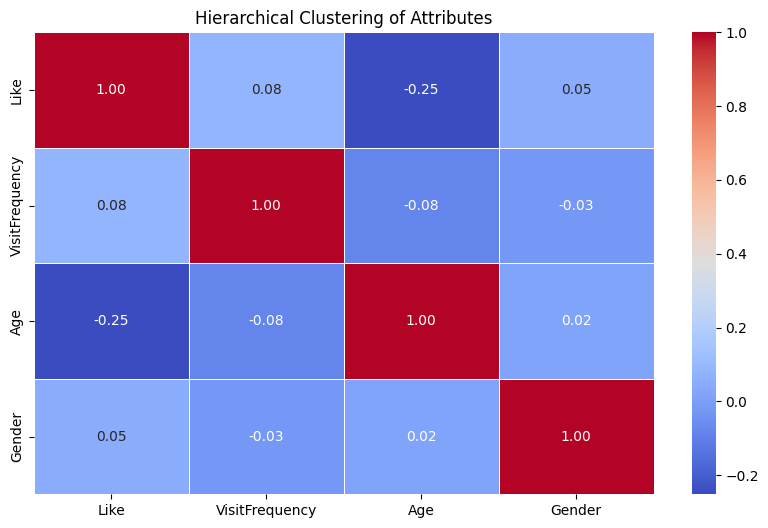

In [57]:
# Step 4: Plot the reordered attributes
plt.figure(figsize=(10, 6))
sns.heatmap(df[reordered_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Hierarchical Clustering of Attributes')
plt.show()

In [ ]:
#Describing Segments

In [59]:
# Calculate summary statistics for each segment
segment_stats = df.groupby('Segment')[features_for_clustering].describe()
print("Segment Summary Statistics:")
print(segment_stats.head())


Segment Summary Statistics:
          Like                                                 Age             \
         count      mean       std  min  25%  50%  75%  max  count       mean   
Segment                                                                         
0        548.0  0.177007  3.141347 -5.0 -3.0  1.0  3.0  5.0  548.0  45.479927   
1        670.0  0.495522  3.075407 -5.0 -2.0  1.0  3.0  5.0  670.0  45.941791   
2        235.0  2.978723  2.057811 -5.0  2.0  3.0  5.0  5.0  235.0  38.753191   

         ... VisitFrequency           Gender                                \
         ...            75%       max  count      mean       std  min  25%   
Segment  ...                                                                 
0        ...       3.061024  3.061024  548.0  0.000000  0.000000  0.0  0.0   
1        ...       3.061024  3.061024  670.0  1.000000  0.000000  1.0  1.0   
2        ...       7.000000  7.000000  235.0  0.502128  0.501063  0.0  0.0   

                

Here's an interpretation of the summary statistics:

Segment 0:

Like: Mean score of 0.18 with a standard deviation of 3.14. Scores range from -5 to 5.
Age: Mean age of 45.48 with variability across a wide range.
VisitFrequency: All individuals have a visit frequency around 3.06.
Gender: All individuals in this segment have a gender value of 0, indicating a specific gender group (e.g., only males).
Segment 1:

Like: Mean score of 0.50 with a standard deviation of 3.08. Scores range from -5 to 5.
Age: Mean age of 45.94 with variability across a wide range.
VisitFrequency: All individuals have a visit frequency around 3.06.
Gender: All individuals in this segment have a gender value of 1, indicating a specific gender group (e.g., only females).
Segment 2:

Like: Mean score of 2.98 with a standard deviation of 2.06. Scores range from -5 to 5.
Age: Mean age of 38.75 with variability across a wide range.
VisitFrequency: All individuals have a visit frequency of 7.
Gender: Individuals in this segment have a balanced gender distribution, with mean gender value around 0.50.

<ipython-input-60-f3e8d17cc32b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['Segment'] == segment], ci=None)
<ipython-input-60-f3e8d17cc32b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['Segment'] == segment], ci=None)
<ipython-input-60-f3e8d17cc32b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['Segment'] == segment], ci=None)


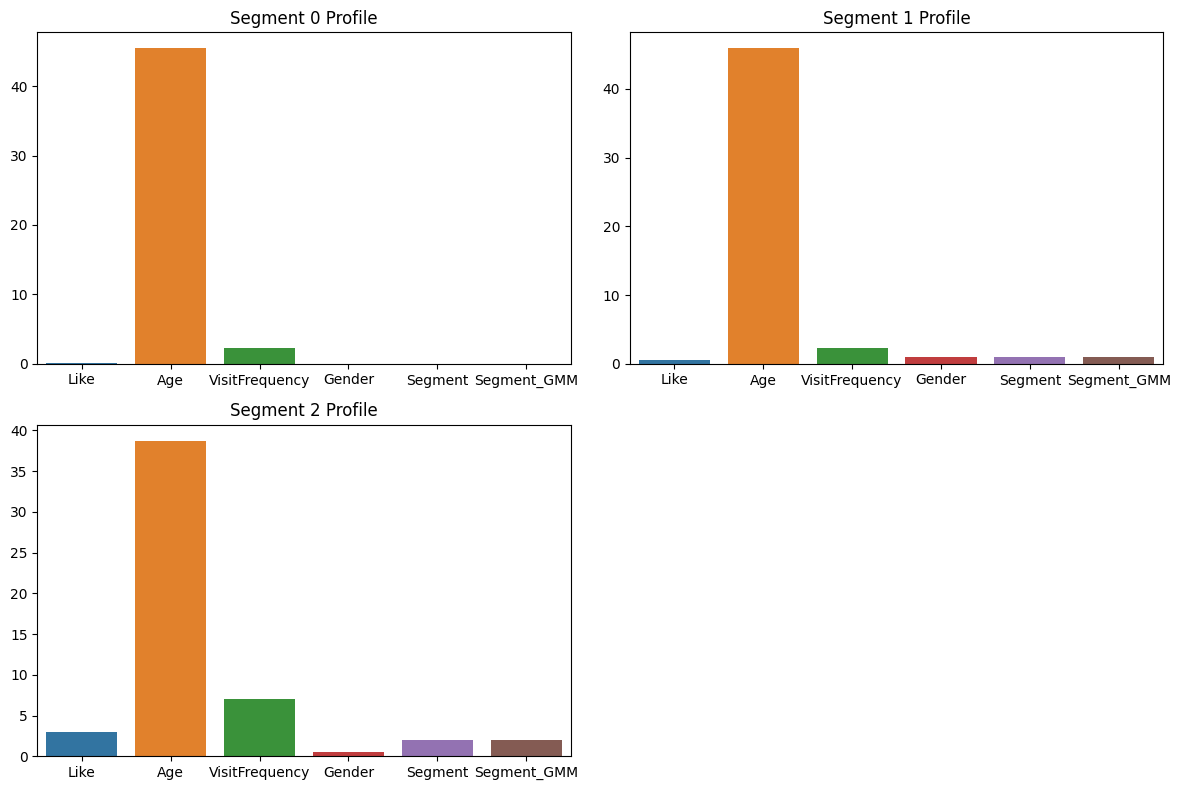

In [60]:
# Visualize segment profiles
plt.figure(figsize=(12, 8))
for segment in range(num_segments):
    plt.subplot(2, 2, segment + 1)
    sns.barplot(data=df[df['Segment'] == segment], ci=None)
    plt.title(f'Segment {segment} Profile')
plt.tight_layout()
plt.show()

In [ ]:
#Selecting (the) Target Segment(s)

In [61]:
# Consideration 1: Segment Size
# Select segments with a sufficient number of individuals (e.g., more than 100)
sufficient_size_segments = segment_stats['Like']['count'] > 100

In [63]:
 #Consideration 2: Segment Characteristics
# Define criteria based on segment characteristics (e.g., age, visit frequency)
criteria_age = (segment_stats['Age']['mean'] < 50)  # Example: Target segments with average age below 50
criteria_visit_frequency = (segment_stats['VisitFrequency']['mean'] > 5)  # Example: Target segments with high visit frequency

In [64]:
# Combine considerations to select target segment(s)
target_segments = sufficient_size_segments & criteria_age & criteria_visit_frequency

# Print selected target segment(s)
print("Selected Target Segment(s) for McDonald's:")
print(target_segments[target_segments].index)

Selected Target Segment(s) for McDonald's:
Int64Index([2], dtype='int64', name='Segment')


In [65]:
# Customizing the Marketing Mix for Segment 3
segment_3_criteria = (df['Segment'] == 2)  # Segment 3 corresponds to index 2


In [66]:
# Product: Develop a distinct product line (e.g., MCSUPERBUDGET line)
# This could involve creating a new column in the DataFrame to indicate the product line
df.loc[segment_3_criteria, 'Product_Line'] = 'MCSUPERBUDGET'

In [67]:
# Price: Set pricing for the MCSUPERBUDGET line
# This could involve adjusting prices for products in the MCSUPERBUDGET line based on segment 3's price expectations
# Example: Reduce prices or offer discounts for products in the MCSUPERBUDGET line
df.loc[segment_3_criteria, 'Price'] = 'Competitive'

In [68]:
# Promotion: Identify and utilize communication channels heavily used by segment 3
# Example: Target social media platforms popular among young customers for promotional campaigns
# This could involve creating targeted marketing campaigns or promotions specifically for segment 3
df.loc[segment_3_criteria, 'Promotion'] = 'Social Media'

In [69]:
# Place: Ensure availability of the MCSUPERBUDGET line through the same distribution channels as the main McDonald's range
# Example: Prominently display the MCSUPERBUDGET line in outlets frequented by segment 3
df.loc[segment_3_criteria, 'Distribution'] = 'McDonald\'s Outlets'


In [70]:
# Print customized marketing mix for segment 3
print("Customized Marketing Mix for Segment 3 (MCSUPERBUDGET line):")
print(df[segment_3_criteria][['Product_Line', 'Price', 'Promotion', 'Distribution']])

Customized Marketing Mix for Segment 3 (MCSUPERBUDGET line):
       Product_Line        Price     Promotion        Distribution
3     MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
7     MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
22    MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
34    MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
50    MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
...             ...          ...           ...                 ...
1430  MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
1432  MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
1434  MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
1441  MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets
1449  MCSUPERBUDGET  Competitive  Social Media  McDonald's Outlets

[235 rows x 4 columns]
